[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

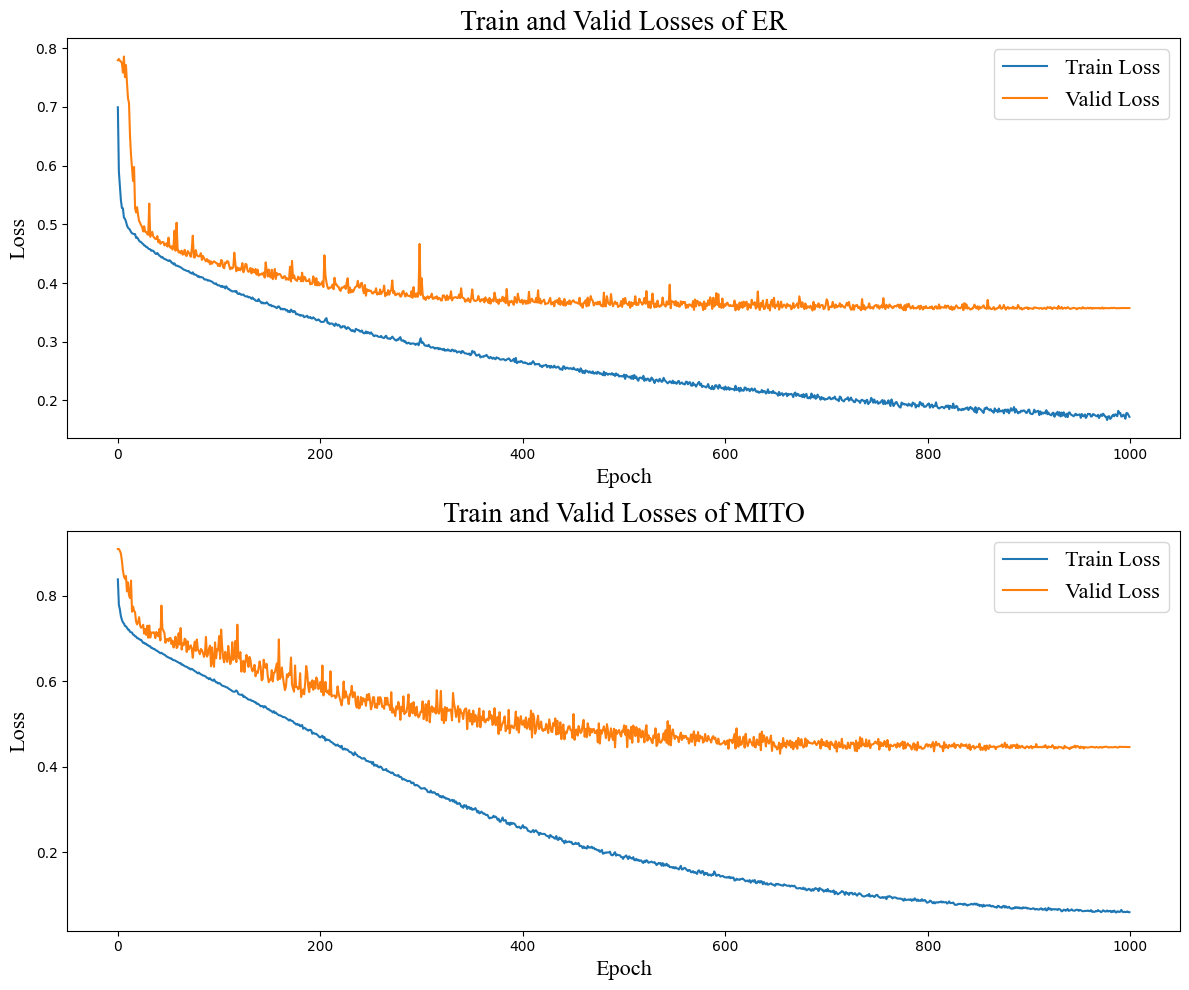

In [26]:
""" ER """
import os
import json
import numpy as np
import matplotlib.pyplot as plt

ER_dir_path = os.path.join('.', 'output', 'exp2_epochs', 'ER_IoULoss_RMSProp_1000')
MITO_dir_path = os.path.join('.', 'output', 'exp2_epochs', 'MITO_IoULoss_RMSProp_1000')

ER_train_valid_loss_path = os.path.join(ER_dir_path, 'train_valid_loss.json')
MITO_train_valid_loss_path = os.path.join(MITO_dir_path, 'train_valid_loss.json')

with open(ER_train_valid_loss_path, 'r') as f:
    ER_train_valid_loss = json.load(f)

with open(MITO_train_valid_loss_path, 'r') as f:
    MITO_train_valid_loss = json.load(f)

ER_train_loss = ER_train_valid_loss['train_loss']
ER_valid_loss = ER_train_valid_loss['valid_loss']
assert len(ER_train_loss) == len(ER_valid_loss), 'train_loss and valid_loss should have the same length'
MITO_train_loss = MITO_train_valid_loss['train_loss']
MITO_valid_loss = MITO_train_valid_loss['valid_loss']
assert len(MITO_train_loss) == len(MITO_valid_loss), 'train_loss and valid_loss should have the same length'

x, ER_y_train, ER_y_valid, MITO_y_train, MITO_y_valid = [],[],[],[],[]
for key in ER_train_loss.keys():
    x.append(int(key))
    ER_y_train.append(ER_train_loss[key])
    ER_y_valid.append(ER_valid_loss[key])
print(x)
for key in MITO_train_loss.keys():
    if not int(key) in x:
        raise ValueError('MITO_train_loss and ER_train_loss should have the same keys')
    MITO_y_train.append(MITO_train_loss[key])
    MITO_y_valid.append(MITO_valid_loss[key])


x = np.array(x)
ER_y_train = np.array(ER_y_train)
ER_y_valid = np.array(ER_y_valid)
MITO_y_train = np.array(MITO_y_train)
MITO_y_valid = np.array(MITO_y_valid)

plt.figure(figsize=(12, 10))
# ER
plt.subplot(2, 1, 1)
plt.title('Train and Valid Losses of ER', fontdict={'family':'Times New Roman','size':20})
plt.xlabel('Epoch', fontdict={'family':'Times New Roman','size':16})
plt.ylabel('Loss', fontdict={'family':'Times New Roman','size':16})
plt.plot(x, ER_y_train, label='Train Loss')
plt.plot(x, ER_y_valid, label='Valid Loss')
plt.legend(loc='upper right', prop={'family':'Times New Roman','size':16})

# MITO
plt.subplot(2, 1, 2)
plt.title('Train and Valid Losses of MITO', fontdict={'family':'Times New Roman','size':20})
plt.xlabel('Epoch', fontdict={'family':'Times New Roman','size':16})
plt.ylabel('Loss', fontdict={'family':'Times New Roman','size':16})
plt.plot(x, MITO_y_train, label='Train Loss')
plt.plot(x, MITO_y_valid, label='Valid Loss')
plt.legend(loc='upper right', prop={'family':'Times New Roman','size':16})

plt.tight_layout()
plt.show()

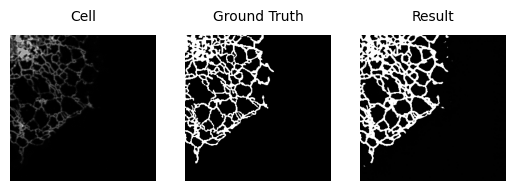

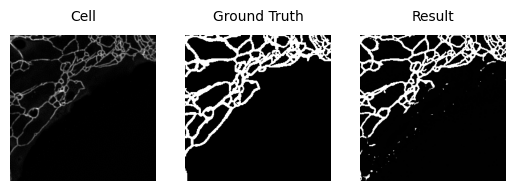

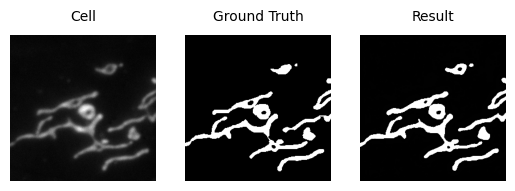

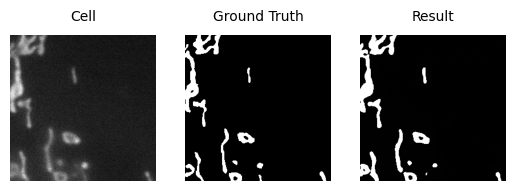

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def get_path(img_name : str, dataset_name : str) -> tuple[str, str, str]:
    cell_path = os.path.join('..', 'data', f'{dataset_name}_dataset', 'test', 'images', f'{img_name}.tif')
    mask_path = os.path.join('..', 'data', f'{dataset_name}_dataset', 'test', 'masks', f'{img_name}.tif')
    result_path = os.path.join('.', 'output', 'exp2_epochs', f'{dataset_name}_IoULoss_RMSProp_1000', 'results', f'{img_name}.tif')
    assert os.path.exists(cell_path), f"Cell image {cell_path} does not exist."
    assert os.path.exists(mask_path), f"Mask image {mask_path} does not exist."
    assert os.path.exists(result_path), f"Result image {result_path} does not exist."   
    return cell_path, mask_path, result_path

# 012_frame_01_iter30L_h945_w1007 ER
# 024_frame_01_iter30M_h1048_w1246 ER
# cell10_1_h141_w145 MITO
#  cell5_h398_w400 MITO
for (img_name, dataset_name) in [
    ('012_frame_01_iter30L_h945_w1007', 'ER'), ('024_frame_01_iter30M_h1048_w1246', 'ER'), 
    ('cell10_1_h141_w145', 'MITO'),            ('cell5_h398_w400', 'MITO')]:
    cell_path, mask_path, result_path = get_path(img_name=img_name, dataset_name=dataset_name)

    cell_img = mpimg.imread(cell_path)
    mask_img = mpimg.imread(mask_path)
    result_img = mpimg.imread(result_path)

    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(cell_img, cmap='gray')
    ax[1].imshow(mask_img, cmap='gray')
    ax[2].imshow(result_img, cmap='gray')
    for a in ax:
        a.set_axis_off()
    for i, label in enumerate(["Cell", "Ground Truth", "Result"]):
        ax[i].text(0.5, 1.1, label, transform=ax[i].transAxes, color='black', fontsize=10, ha='center', backgroundcolor='white')

    plt.show()
